### Student Information
Name: Hung-Ting Hsieh (謝弘廷)

Student ID: 110704054

GitHub ID: Kevindic0214

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

### First Section: Exercise from the Lab-1-Master

In [ ]:
# Exercise 2 (Take Home)

# Answer here
# 過濾出屬於 'sci.med' 類別的記錄
sci_med_data = X.loc[X['category_name'] == 'sci.med']

print(sci_med_data)

In [ ]:
# Exercise 5 (Take Home)

# Answer here
# .isnull() only recognizes np.nan, None, or specific missing data types but does not catch strings like 'NaN', 'None', or an empty string. 
# This is why it only flagged some entries as True.

Exercise 6 (Take Home)

Answer here <br>
The Changes are the index is not in order anymore, and the data is a random sample of 1000 records from the original dataset, 
which means that the length of the dataset is less than origianl one.

In [ ]:
# Exercise 8 (Take Home)

# Answer here
# 計算每個數據集中 'category_name' 的分佈
category_counts_X = X['category_name'].value_counts()
category_counts_X_sample = X_sample['category_name'].value_counts()

# 將兩個數據集的 category_name 分佈對齊
categories = category_counts_X.index.union(category_counts_X_sample.index)
category_counts_X = category_counts_X.reindex(categories, fill_value=0)
category_counts_X_sample = category_counts_X_sample.reindex(categories, fill_value=0)

import matplotlib.pyplot as plt
import numpy as np

# 設置條形的位置
bar_width = 0.15  # 每個條形的寬度
index = np.arange(len(categories))  # X 軸的類別位置

# 創建條形圖
plt.bar(index, category_counts_X, bar_width, label='X')  # 原數據集的條形
plt.bar(index + bar_width, category_counts_X_sample, bar_width, label='X_sample')  # 抽樣數據集的條形

# 添加標題和標籤
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, categories)  # 設置 X 軸刻度和旋轉角度
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()

In [ ]:
# Exercise 10 (Take Home)

# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# Assume count_vect and X_counts have already been initialized
# Step 1: Retrieve the term frequency vector of the fifth record
fifth_record = X_counts[4]

# Step 2: Find the positions of all non-zero elements (which represent the words that appear in this record)
non_zero_indices = fifth_record.nonzero()[1]

# Step 3: Retrieve the position of the second word that appears (the second '1' in the matrix)
second_index = non_zero_indices[1]

# Step 4: Retrieve the vocabulary and find the word corresponding to the second index
feature_names = count_vect.get_feature_names_out()
second_word = feature_names[second_index]

# Display the result
print("The second word in the fifth record is:", second_word)

In [ ]:
# Exercise 11 (Take Home)

# Answer here
# 取樣100篇文章和100個詞
plot_z = X_counts[0:100, 0:100].toarray()

# 繪製更大的熱圖
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 建立 DataFrame
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# 繪圖
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)  # 不顯示數字以減少擁擠
plt.show()

In [ ]:
# Cont.

# 計算每個詞的總出現次數
term_frequencies = X_counts.sum(axis=0).A1  # A1 是將矩陣轉為一維數組
top_term_indices = term_frequencies.argsort()[-100:]  # 選擇出現頻率最高的100個詞

# 繪製這些詞與100篇文章的熱圖
plot_z = X_counts[0:100, top_term_indices].toarray()

# 更新 X 軸詞彙標籤
plot_x = ["term_"+str(i) for i in top_term_indices]

# 繪圖
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()

In [ ]:
# Exercise 12 (Take Home)

# Answer here
import plotly.express as px
import pandas as pd

# 將詞頻數據轉換為 DataFrame 以便繪圖
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:300],  # 前 300 個詞彙
    "Frequencies": term_frequencies[:300]              # 對應的詞頻
})

# 使用 Plotly 繪製柱狀圖
fig = px.bar(df, x='Terms', y='Frequencies', title="Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# 更新 X 軸標籤旋轉角度，以避免擁擠
fig.update_layout(xaxis_tickangle=-90)

# 顯示圖表
fig.show()

In [ ]:
# Exercise 13 (Take Home)

# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: 計算每個詞的總頻率
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Step 2: 選擇前 50 個頻率最高的詞
top_n = 50
top_term_indices = term_frequencies.argsort()[-top_n:]  # 找到頻率最高的詞的索引

# Step 3: 創建 DataFrame，將這些詞的詞彙與其對應的頻率對應起來
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[top_term_indices],  # 高頻詞
    "Frequencies": term_frequencies[top_term_indices]  # 對應的頻率
})

# Step 4: 使用 Plotly 繪製交互式圖表
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 50 Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: 旋轉 X 軸的標籤，避免擁擠
fig.update_layout(xaxis_tickangle=-90)

# Step 6: 顯示圖表
fig.show()

In [ ]:
# Exercise 14 (Take Home)

# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: 計算每個詞的總頻率
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Step 2: 將詞彙和它們的頻率排序（降序）
sorted_indices = np.argsort(term_frequencies)[::-1]  # 逆序排列詞頻，從高到低
sorted_frequencies = term_frequencies[sorted_indices]  # 按照排序後的索引獲取詞頻
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]  # 按照排序後的索引獲取詞彙

# Step 3: 選擇前 100 個詞進行可視化（根據詞頻排序）
top_n = 100
df = pd.DataFrame({
    "Terms": sorted_terms[:top_n],  # 頻率最高的前 100 個詞
    "Frequencies": sorted_frequencies[:top_n]  # 對應的詞頻
})

# Step 4: 使用 Plotly 繪製詞頻分佈圖
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 100 Term Frequencies (Sorted by Frequency)", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: 更新 X 軸標籤角度以避免擁擠
fig.update_layout(xaxis_tickangle=-90)

# Step 6: 顯示圖表
fig.show()

In [ ]:
# Exerxise 15 (Take Home)

# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: 計算每個詞的總頻率
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Step 2: 將詞頻取對數，防止 log(0) 的問題，用 log(1 + term_frequency)
term_frequencies_log = np.log1p(term_frequencies)  # log(1+x) 是為了避免 log(0)

# Step 3: 按照詞頻排序
sorted_indices = np.argsort(term_frequencies_log)[::-1]  # 逆序排列詞頻
sorted_frequencies_log = term_frequencies_log[sorted_indices]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]

# Step 4: 選擇前 100 個詞進行可視化（根據對數詞頻排序）
top_n = 100
df_log = pd.DataFrame({
    "Terms": sorted_terms[:top_n],  # 前 100 個詞
    "Log Frequencies": sorted_frequencies_log[:top_n]  # 對應的對數詞頻
})

# Step 5: 使用 Plotly 繪製對數詞頻分佈圖
fig_log = px.bar(df_log, x='Terms', y='Log Frequencies', title="Top 100 Term Log Frequencies (Sorted by Log Frequency)", labels={'Terms': 'Terms', 'Log Frequencies': 'Log Frequencies'})

# Step 6: 更新 X 軸標籤角度以避免擁擠
fig_log.update_layout(xaxis_tickangle=-90)

# Step 7: 顯示圖表
fig_log.show()


# Logarithmic distribution of term frequencies vs. original term frequencies
# Original woed frequencies distrubution shows the actual woed frequencies in the text data. 
# Words that appear more frequently occupy the left side of the graph, while words with low frequencies are almost unnoticeable in the picture.
# Logarithmic distribution of term frequencies shows the logarithmic transformation of the original term frequencies. 
# The logarithmic transformation makes the distribution more evenly distributed, making it easier to observe the differences in term frequencies.

In [ ]:
# Exercise 16 (Take Home)

# Answer here
def filter_top_bottom_words(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_counts = term_document_df.sum(axis=0).to_numpy()  # 計算每個詞的總頻次
    sorted_indices = np.argsort(word_counts)  # 獲取升序排列的索引
    sorted_counts = word_counts[sorted_indices]  # 根據頻次排序
    
    total_terms = len(sorted_counts)  # 詞彙的總數
    
    # 計算最高 5% 和最低 1% 詞彙的索引
    top_5_percent_index = int(top_percent * total_terms)
    bottom_1_percent_index = int(bottom_percent * total_terms)
    
    # 獲取最高 5% 和最低 1% 的索引
    top_5_percent_indices = sorted_indices[-top_5_percent_index:]  # 最後的 top 5% 詞
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]  # 最前的 bottom 1% 詞
    
    # 過濾掉這些詞的索引
    filtered_indices = np.concatenate([top_5_percent_indices, bottom_1_percent_indices])
    
    # 使用 CountVectorizer 來獲取這些詞
    filtered_words = [count_vect.get_feature_names_out()[i] for i in filtered_indices]
    
    # 將詞彙按照字母順序排序
    filtered_words_sorted = sorted(filtered_words)
    
    return filtered_words_sorted  # 返回按字母順序排列的被過濾詞彙

for category in categories:
    print(f"\nCategory: {category}")
    
    # 獲取篩選掉的詞（最高 5% 和最低 1%）
    filtered_words = filter_top_bottom_words(term_document_dfs[category])
    
    # 顯示被過濾掉的詞彙總數和具體詞彙（已排序）
    print(f"Number of filtered words: {len(filtered_words)}")
    print(f"Filtered words (alphabetically sorted): {filtered_words}")

**Answer for Exercise 16** <br>
觀察資料可以發現，被過濾掉的數據幾乎都是數字以及帶有底線的文字，以及一些常用的文字和類似亂碼的文字。

In [ ]:
# Exercise 17 (Take Home)

from PAMI.frequentPattern.topk import FAE as alg
import pandas as pd

# 設定輸入參數
inputFile = 'td_freq_db_comp_graphics.csv'  # 交易數據庫的文件路徑
separator = ','  # 設定分隔符號（根據檔案格式）
klist = [500, 1000, 1500]  # 不同的 k 值

# 初始化一個數據框來存儲FAE的結果
result = pd.DataFrame(columns=['algorithm', 'k', 'patterns', 'runtime', 'memory'])

# 迴圈不同的 k 值執行算法
for kCount in klist:
    obj = alg.FAE(inputFile, k=kCount, sep=separator)
    obj.mine()  # 控掘頻繁模式
    # 將結果存儲到數據框中
    result.loc[result.shape[0]] = ['FAE', kCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

# 打印結果
print("TopK frequent patterns were successfully generated using FAE algorithm.")
print(result)

In [ ]:
# Exercise 18 (Take Home)

# Answer here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA, t-SNE, and UMAP with n_components=3
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define the category labels for coloring the scatter plots
categories = X['category_name'].unique()

# Create a function for 3D plotting
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in enumerate(categories):
        xs = X_reduced[X['category_name'] == category, 0]
        ys = X_reduced[X['category_name'] == category, 1]
        zs = X_reduced[X['category_name'] == category, 2]
        ax.scatter(xs, ys, zs, label=category)

    ax.view_init(elev=elev, azim=azim)  # Set camera position
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Plot results with different angles
fig = plt.figure(figsize=(18, 6))

# PCA
ax = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax, X_pca_tdm, 'PCA', elev=20, azim=60)

# t-SNE
ax = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax, X_tsne_tdm, 't-SNE', elev=30, azim=120)

# UMAP
ax = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax, X_umap_tdm, 'UMAP', elev=45, azim=180)

plt.suptitle('3D Comparison of PCA, t-SNE, and UMAP')
plt.show()

In [ ]:
# Exercise 19 (Take Home)

# Answer here
from sklearn import preprocessing

# 初始化 LabelBinarizer
mlb = preprocessing.LabelBinarizer()

# 對 category_name 欄位進行訓練
mlb.fit(X['category_name'])

# 將 category_name 欄位進行二進位化，並儲存在 bin_category_name 欄位
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

# 檢查結果
X[0:9]

### Second Section: Emplement the new dataset

## 1. Data Preparation

In [1]:
from datasets import load_dataset

# Load the YouTube sentiment analysis dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

In [2]:
ds['train'].features

{'sentiment': Value(dtype='string', id=None),
 'comment': Value(dtype='string', id=None)}

In [3]:
# Display the first record in the training set to ensure data is loaded correctly
print(ds['train'][0])

{'sentiment': 'not nostalgia', 'comment': 'He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.'}


In [4]:
# Check the unique sentiment labels 'nostalgia' and 'not nostalgia'
print(set(ds['train']['sentiment']))

{'not nostalgia', 'nostalgia'}


In [5]:
# Check the total number of rows in the training set
print(f"Total number of rows in the training set: {len(ds['train'])}")

Total number of rows in the training set: 1500


In [6]:
# Check the column names in the dataset
print(f"Columns in the dataset: {ds['train'].column_names}")

Columns in the dataset: ['sentiment', 'comment']


In [7]:
# Display the first comment and its corresponding sentiment label
print(ds['train']['comment'][0])  # Display the first comment
print(ds['train']['sentiment'][0])  # Display the corresponding sentiment label

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
not nostalgia


In [8]:
# Get the distribution of sentiment labels
sentiment_distribution = ds['train'].to_pandas()['sentiment'].value_counts()
print(sentiment_distribution)

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [9]:
import pandas as pd

# Convert the dataset from dictionary format to pandas DataFrame
df_youtube = pd.DataFrame({
    'comment': ds['train']['comment'],  # Extract the comments
    'sentiment': ds['train']['sentiment']  # Extract the sentiment labels
})

# Display the first few rows of the DataFrame to ensure the conversion is successful
print(df_youtube.head())

                                             comment      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia


In [10]:
# Display the structure of the DataFrame
print(df_youtube.info())

# Check the distribution of sentiment labels again to ensure data is correct
print(df_youtube['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    1500 non-null   object
 1   sentiment  1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


In [11]:
# Add sentiment column to the DataFrame (this will be the numerical label)
df_youtube['sentiment_numeric'] = df_youtube['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

# Display the first 10 rows to check the result
print(df_youtube.head(10))

                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   
9  Elvis will always be number one no one can com...  not nostalgia   

   sentiment_numeric  
0                  0  
1                  1  
2                  1  
3                  0  
4                  1  
5                  1  
6                  1  
7                  1  
8          

In [12]:
def format_labels(target, docs):
    """ Format the numerical labels to textual labels """
    return 'nostalgia' if target == 1 else 'not nostalgia'

# Apply the format_labels function to add a formatted label column
df_youtube['sentiment_label'] = df_youtube['sentiment_numeric'].apply(lambda t: format_labels(t, df_youtube))

# Display the first 10 rows to see the final DataFrame
print(df_youtube.head(10))

                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   
9  Elvis will always be number one no one can com...  not nostalgia   

   sentiment_numeric sentiment_label  
0                  0   not nostalgia  
1                  1       nostalgia  
2                  1       nostalgia  
3                  0   not nostalgia  
4                  1   

In [13]:
# Drop the original 'sentiment' column
df_youtube = df_youtube.drop(columns=['sentiment'])

# Display the updated DataFrame to ensure the column is removed
print(df_youtube.head(10))

                                             comment  sentiment_numeric  \
0  He was a singer with a golden voice that I lov...                  0   
1  The mist beautiful voice ever I listened to hi...                  1   
2  I have most of Mr. Reeves songs.  Always love ...                  1   
3  30 day leave from 1st tour in Viet Nam to conv...                  0   
4  listening to his songs reminds me of my mum wh...                  1   
5  Every time I heard this song as a child, I use...                  1   
6  My dad loved listening to Jim Reeves, when I w...                  1   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...                  1   
8           Wherever you  are you always in my heart                  0   
9  Elvis will always be number one no one can com...                  0   

  sentiment_label  
0   not nostalgia  
1       nostalgia  
2       nostalgia  
3   not nostalgia  
4       nostalgia  
5       nostalgia  
6       nostalgia  
7       nostal

In [14]:
df_youtube[:10][["comment", "sentiment_label"]]

,comment,sentiment_label
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [15]:
df_youtube.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [16]:
df_youtube.iloc[:10, 0]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [17]:
# Check for missing values in the DataFrame
missing_values = df_youtube.isnull().sum()

# Display the missing values for each column
print(missing_values)

comment              0
sentiment_numeric    0
sentiment_label      0
dtype: int64


In [18]:
import helpers.data_mining_helpers as dmh
df_youtube.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,sentiment_numeric,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [19]:
# Exercise 4
# Answer here
import helpers.data_mining_helpers as dmh
df_youtube.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 4.2 Dealing with Duplicate Data

In [20]:
df_youtube.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [21]:
sum(df_youtube.duplicated())

1

In [22]:
sum(df_youtube.duplicated('comment'))

1

In [23]:
# Find all duplicated rows, including the first occurrence
duplicated_all = df_youtube[df_youtube.duplicated(keep=False)]

# Display all duplicated rows
print(duplicated_all)

                                              comment  sentiment_numeric  \
62  never heard this song before... WOW What an am...                  0   
78  never heard this song before... WOW What an am...                  0   

   sentiment_label  
62   not nostalgia  
78   not nostalgia  


In [24]:
# Remove duplicated rows, keep the first occurrence
df_youtube_cleaned = df_youtube.drop_duplicates()

# Display the cleaned DataFrame
print(df_youtube_cleaned)

                                                comment  sentiment_numeric  \
0     He was a singer with a golden voice that I lov...                  0   
1     The mist beautiful voice ever I listened to hi...                  1   
2     I have most of Mr. Reeves songs.  Always love ...                  1   
3     30 day leave from 1st tour in Viet Nam to conv...                  0   
4     listening to his songs reminds me of my mum wh...                  1   
...                                                 ...                ...   
1495  i don't know!..but the opening of the video,.....                  0   
1496  it's sad this is such a beautiful song when yo...                  0   
1497  Dear Friend, I think age and time is not that ...                  0   
1498  I was born in 1954 and started to be aware of ...                  1   
1499  This is the first CD I bought after my marriag...                  1   

     sentiment_label  
0      not nostalgia  
1          nostal

## 5. Data Preprocessing

### 5.1 Sampling

In [25]:
# Randomly sample 1000 rows
sampled_youtube = df_youtube.sample(n=1000, random_state=42)

# Display the sampled data
print(sampled_youtube.head())

                                                comment  sentiment_numeric  \
1116  Perception of death, birth, sorrow, suffering,...                  0   
1368  One of those Classic (and there were so many o...                  0   
422             So many memories in each and every song                  1   
413   Was it in 1968 when Engelbert released it?  I ...                  1   
451   OMG talk about take a trip down memory lane ho...                  1   

     sentiment_label  
1116   not nostalgia  
1368   not nostalgia  
422        nostalgia  
413        nostalgia  
451        nostalgia  


In [26]:
sampled_youtube[:4]

,comment,sentiment_numeric,sentiment_label
1116,"Perception of death, birth, sorrow, suffering,...",0,not nostalgia
1368,One of those Classic (and there were so many o...,0,not nostalgia
422,So many memories in each and every song,1,nostalgia
413,Was it in 1968 when Engelbert released it? I ...,1,nostalgia


sentiment_label
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


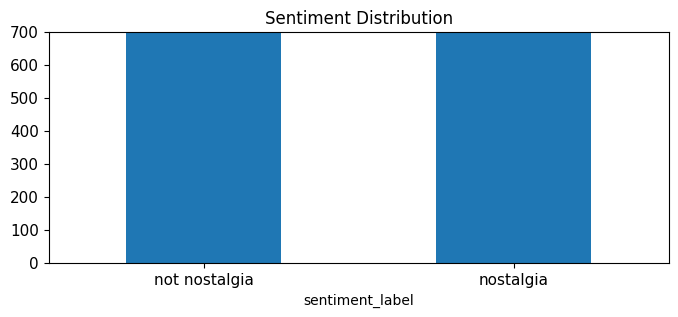

In [27]:
import matplotlib.pyplot as plt

# Count the occurrence of each sentiment label
sentiment_counts = df_youtube['sentiment_label'].value_counts()
print(sentiment_counts)

# Plot barchart for sentiment counts
sentiment_counts.plot(kind='bar', 
                      title='Sentiment Distribution', 
                      ylim=[0, 700], 
                      rot=0, fontsize=11, figsize=(8, 3))

# Show the plot
plt.show()

sentiment_label
nostalgia        507
not nostalgia    493
Name: count, dtype: int64


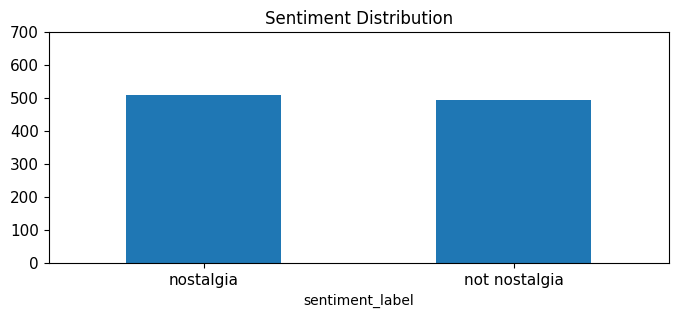

In [28]:
import matplotlib.pyplot as plt

# Count the occurrence of each sentiment label
sentiment_counts = sampled_youtube['sentiment_label'].value_counts()
print(sentiment_counts)

# Plot barchart for sentiment counts
sentiment_counts.plot(kind='bar', 
                      title='Sentiment Distribution', 
                      ylim=[0, 700], 
                      rot=0, fontsize=11, figsize=(8, 3))

# Show the plot
plt.show()

### >>> **Exercise 8 (take home):** 

In [29]:
# Calculate the sentiment distribution for the full dataset
sentiment_counts_full = df_youtube['sentiment_label'].value_counts()

# Calculate the sentiment distribution for the sampled dataset
sentiment_counts_sampled = sampled_youtube['sentiment_label'].value_counts()

In [30]:
import pandas as pd

# Create a DataFrame that contains both distributions
comparison_df = pd.DataFrame({
    'Full Dataset': sentiment_counts_full,
    'Sampled Dataset': sentiment_counts_sampled
})

# Fill missing values with 0 (in case some labels are missing in the sampled dataset)
comparison_df = comparison_df.fillna(0)

# Display the comparison DataFrame (optional, to check the structure)
print(comparison_df)

                 Full Dataset  Sampled Dataset
sentiment_label                               
nostalgia                 750              507
not nostalgia             750              493


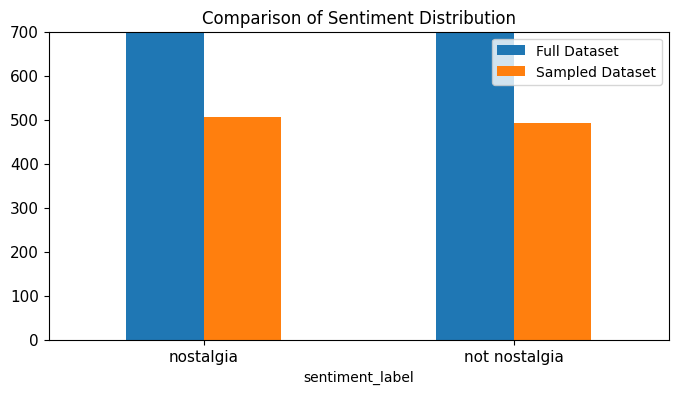

In [31]:
import matplotlib.pyplot as plt

# Plot side-by-side bar chart
comparison_df.plot(kind='bar', 
                   title='Comparison of Sentiment Distribution',
                   ylim=[0, 700], 
                   rot=0, fontsize=11, figsize=(8, 4))

# Show the plot
plt.show()

In [32]:
import nltk
nltk.download('punkt')  # Download the 'punkt' datasets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Apply the improved tokenize_text function to the text column
df_youtube['unigrams'] = df_youtube['comment'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
# Show the cleaned tokens
df_youtube[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [35]:
df_youtube[0:4]

,comment,sentiment_numeric,sentiment_label,unigrams
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [36]:
list(df_youtube[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts_youtube = count_vect.fit_transform(df_youtube['comment'])

print(X_counts_youtube.shape)  # Display the shape of the matrix
print(count_vect.get_feature_names_out()[:10])  # Display the first 10 feature names

(1500, 3730)
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


In [38]:
print(X_counts_youtube[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [39]:
count_vect.get_feature_names_out()[1598]

'he'

In [40]:
count_vect.get_feature_names_out()[3284]

'the'

### **>>> Exercise 9:**

In [41]:
analyze = count_vect.build_analyzer()
analyze(df_youtube["comment"][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [49]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [42]:
# we convert from sparse array to normal array
X_counts_youtube[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [43]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [45]:
# Get feature names (words) from the CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Find the first occurrence of 1 in the sparse matrix
import numpy as np

# Convert sparse matrix to array (or you can leave it as sparse if preferred)
X_array = X_counts_youtube.toarray()

# Find the index of the first occurrence of 1
row_index, col_index = np.argwhere(X_array == 1)[0]

# Get the corresponding word using the feature name list
first_word = feature_names[col_index]
print(f"The first word corresponding to 1 is: {first_word}")

The first word corresponding to 1 is: 16years


### **>>> Exercise 10 (take home):**

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Assume count_vect and X_counts_youtube have already been initialized
# Step 1: Retrieve the term frequency vector of the fifth record
one_count = 0
target_record = None
target_word = None

# Step 2: Find the position of the second '1' in the matrix
for i in range(X_counts_youtube.shape[0]):
    record = X_counts_youtube[i]
    
    # Extract the indices of non-zero elements (which represent the words that appear in this record)
    non_zero_indices = record.nonzero()[1]
    
    # Step 3: Find the position of the second word that appears (the second '1' in the matrix)
    for index in non_zero_indices:
        one_count += 1
        if one_count == 2:  # Find the second '1'
            target_record = i
            target_word = count_vect.get_feature_names_out()[index]
            break  
        
    if target_record is not None:  # Stop if the target record is found
        break

# 顯示結果
if target_record is not None:
    print(f"The second '1' is found in record {target_record}, and the word is '{target_word}'.")
else:
    print("The second '1' was not found.")


The second '1' is found in record 0, and the word is 'was'.


In [47]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [48]:
# obtain document index
plot_y = ["doc_"+str(i) for i in list(df_youtube.index)[0:20]]

In [50]:
plot_z = X_counts_youtube[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

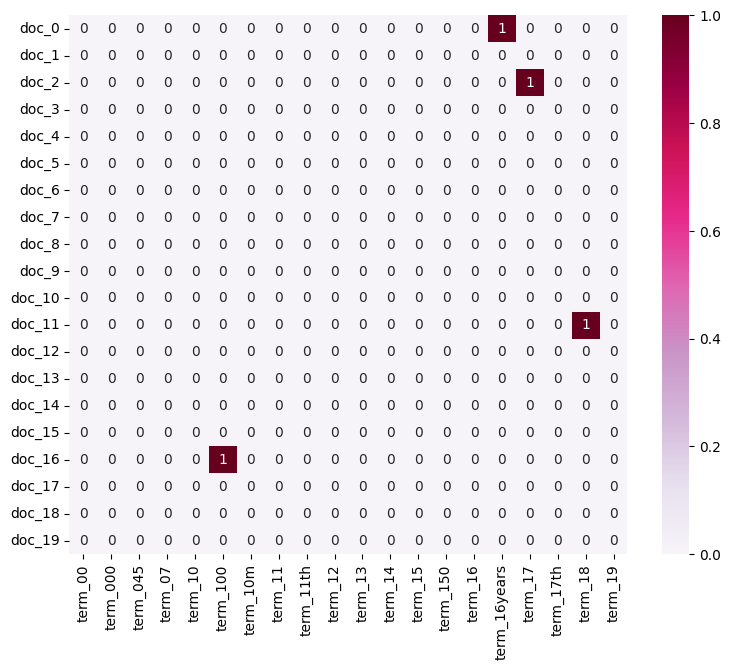

In [51]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

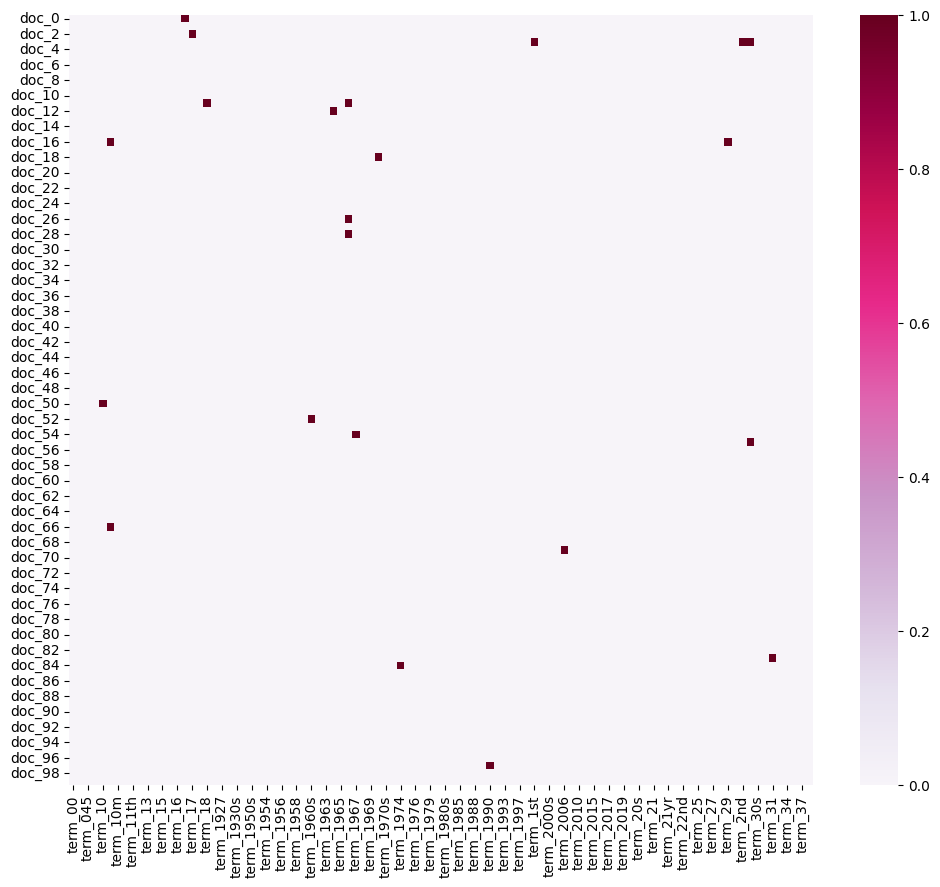

In [55]:
# Answer here
# Sample 100 documents and 100 terms
plot_z = X_counts_youtube[0:100, 0:100].toarray()

# Create a larger heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(df_youtube.index)[0:100]]
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()

### 5.4 Attribute Transformation / Aggregation

In [56]:
# 
term_frequencies = []
for j in range(0, X_counts_youtube.shape[1]):
    term_frequencies.append(sum(X_counts_youtube[:,j].toarray()))

In [58]:
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0))[0]

In [59]:
term_frequencies[0]

np.int64(1)

C:\Users\user\AppData\Local\Temp\ipykernel_25928\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

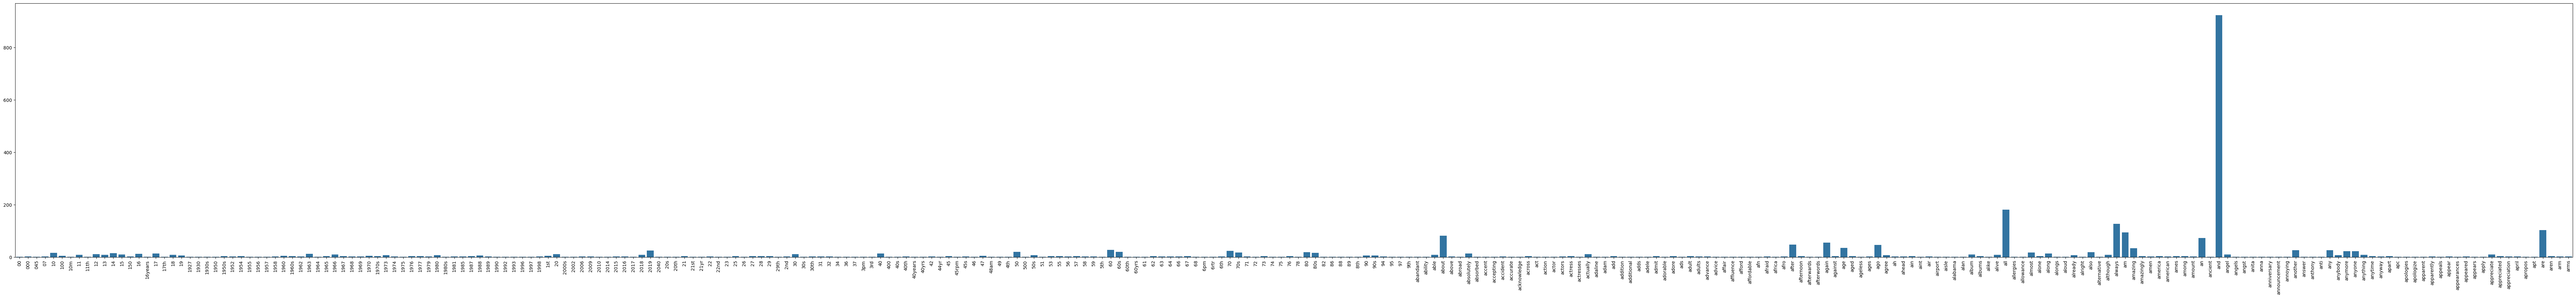

In [60]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 12 (take home):**

In [61]:
# Answer here
import plotly.express as px
import pandas as pd

# Transform term frequencies into a DataFrame for plotting
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:300],  # First 300 terms
    "Frequencies": term_frequencies[:300]              # Corresponding frequencies
})

# Use Plotly to create a bar chart
fig = px.bar(df, x='Terms', y='Frequencies', title="Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Display the plot
fig.show()

### >>> **Exercise 13 (take home):** 

In [62]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Select the top 50 terms with the highest frequencies
top_n = 50
top_term_indices = term_frequencies.argsort()[-top_n:]  # Find the indices of the most frequent terms

# Step 3: Create a DataFrame to pair these terms with their frequencies
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[top_term_indices],  # Top 50 terms
    "Frequencies": term_frequencies[top_term_indices]  # Corresponding frequencies
})

# Step 4: Use Plotly to create an interactive bar chart
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 50 Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Step 6: Display the plot
fig.show()

### >>> **Exercise 14 (take home):** 

In [63]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Sort the terms and their frequencies (in descending order)
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort the frequencies in descending order
sorted_frequencies = term_frequencies[sorted_indices]  # Get the frequencies according to the sorted indices
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]  # Get the terms according to the sorted indices

# Step 3: Select the top 100 terms for visualization (sorted by frequency)
top_n = 100
df = pd.DataFrame({
    "Terms": sorted_terms[:top_n],  # Top 100 terms
    "Frequencies": sorted_frequencies[:top_n]  # Corresponding frequencies
})

# Step 4: Use Plotly to create a bar chart of the top 100 term frequencies
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 100 Term Frequencies (Sorted by Frequency)", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Step 6: Display the plot
fig.show()

In [64]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\user\AppData\Local\Temp\ipykernel_25928\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

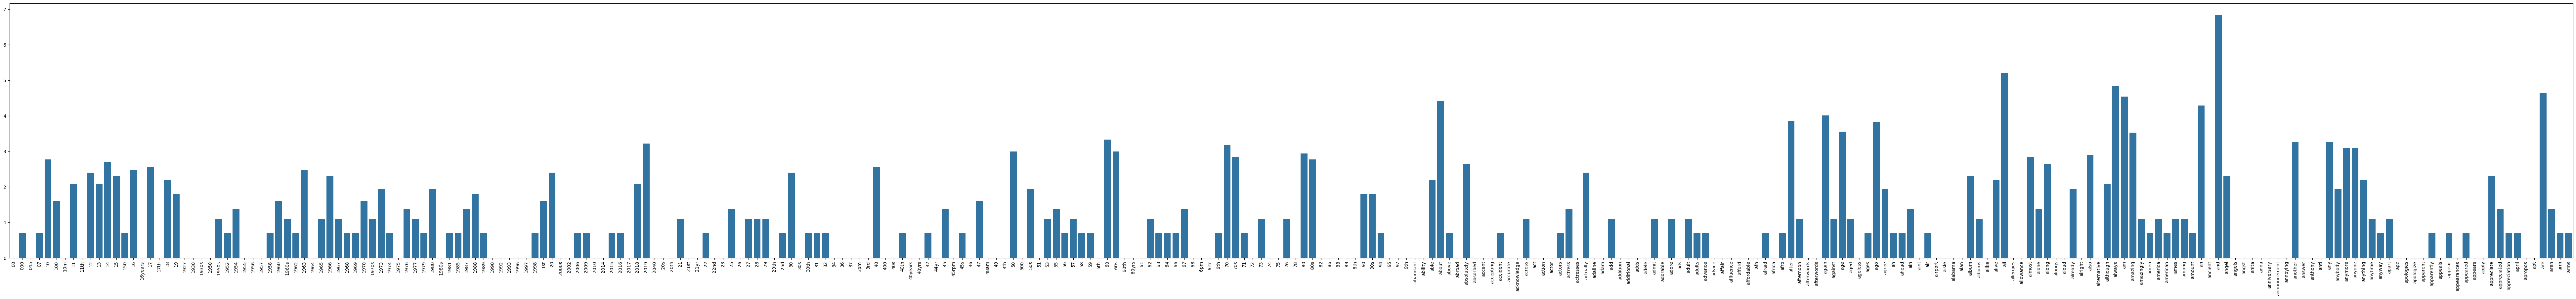

In [65]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 15 (take home):** 

In [66]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Take the logarithm of term frequencies to avoid log(0) issues
term_frequencies_log = np.log1p(term_frequencies)  # log(1+x) is used to avoid log(0)

# Step 3: Sort the terms by frequency
sorted_indices = np.argsort(term_frequencies_log)[::-1]  # Sort the frequencies in descending order
sorted_frequencies_log = term_frequencies_log[sorted_indices]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]

# Step 4: Select the top 100 terms for visualization (sorted by log frequency)
top_n = 100
df_log = pd.DataFrame({
    "Terms": sorted_terms[:top_n],
    "Log Frequencies": sorted_frequencies_log[:top_n]
})

# Step 5: Use Plotly to create a bar chart of the top 100 term log frequencies
fig_log = px.bar(df_log, x='Terms', y='Log Frequencies', title="Top 100 Term Log Frequencies (Sorted by Log Frequency)", labels={'Terms': 'Terms', 'Log Frequencies': 'Log Frequencies'})

# Step 6: Rotate x-axis labels to avoid crowding
fig_log.update_layout(xaxis_tickangle=-90)

# Step 7: 
fig_log.show()


# Logarithmic distribution of term frequencies vs. original term frequencies
# Original woed frequencies distrubution shows the actual woed frequencies in the text data. 
# Words that appear more frequently occupy the left side of the graph, while words with low frequencies are almost unnoticeable in the picture.
# Logarithmic distribution of term frequencies shows the logarithmic transformation of the original term frequencies. 
# The logarithmic transformation makes the distribution more evenly distributed, making it easier to observe the differences in term frequencies.

###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.